# Analysis: Language Properties over Time

## Load Data 

In [161]:
%matplotlib widget
import numpy as np, os, sys, matplotlib.pyplot as plt, seaborn as sns, pandas, orjson, regex as re
from tqdm.notebook import tqdm, trange
from iso639 import languages
from langdetect import detect
from mosestokenizer import MosesTokenizer
tqdm.pandas()

In [5]:
df = pandas.read_csv('lpt_df_moses.csv')

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/2638080142.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv('lpt_df.csv')


## Type-Token Ratio over Time

In [219]:
pubmed_df = df[df['has_pubmed'] == True]

pubmed_loaded_df = pandas.read_csv('pubmed_df.csv', usecols=['bin', 'corpusid', 'abstract', 'has_pubmed', 'moses_tokens', 'num_spm_20_tokens', 'num_spm_40_tokens', \
       'num_spm_60_tokens', 'num_spm_80_tokens', 'num_moses_tokens', \
       'num_spm_20_continuation_tokens', 'num_spm_40_continuation_tokens', \
       'num_spm_60_continuation_tokens', 'num_spm_80_continuation_tokens'])

pubmed_temp = pubmed_df
pubmed_df = pubmed_loaded_df

In [217]:
pubmed_loaded_df.columns

Index(['bin', 'corpusid', 'abstract', 'has_pubmed', 'moses_tokens',
       'num_spm_20_tokens', 'num_spm_40_tokens', 'num_spm_60_tokens',
       'num_spm_80_tokens', 'num_moses_tokens',
       'num_spm_20_continuation_tokens', 'num_spm_40_continuation_tokens',
       'num_spm_60_continuation_tokens', 'num_spm_80_continuation_tokens'],
      dtype='object')

In [215]:
pubmed_loaded_df

,bin,corpusid,abstract,has_pubmed,moses_tokens,moses_tokens_eval,num_spm_20_tokens,num_spm_40_tokens,num_spm_60_tokens,num_spm_80_tokens,num_moses_tokens,num_spm_20_continuation_tokens,num_spm_40_continuation_tokens,num_spm_60_continuation_tokens,num_spm_80_continuation_tokens
0,0,31685335,Introduction. Since the observation by Koch 1 ...,True,"['Introduction', '.', 'Since', 'the', 'observa...","['Introduction', '.', 'Since', 'the', 'observa...",295,290,291,292,288,37,32,33,34
1,0,37429768,The following paper is based on the results ob...,True,"['The', 'following', 'paper', 'is', 'based', '...","['The', 'following', 'paper', 'is', 'based', '...",167,157,160,160,148,49,39,42,42
2,0,43937120,me by an invitation to contribute on the subje...,True,"['me', 'by', 'an', 'invitation', 'to', 'contri...","['me', 'by', 'an', 'invitation', 'to', 'contri...",151,145,148,145,131,40,34,37,34
3,0,12122232,"WHEN engaged in examining, under the microscop...",True,"['WHEN', 'engaged', 'in', 'examining', ',', 'u...","['WHEN', 'engaged', 'in', 'examining', ',', 'u...",363,354,352,356,373,61,52,50,54
4,0,29737367,OPHTHALMOLOGISTS have become familiar recently...,True,"['OPHTHALMOLOGISTS', 'have', 'become', 'famili...","['OPHTHALMOLOGISTS', 'have', 'become', 'famili...",359,333,335,341,312,85,59,61,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198629,99,253578922,"The article presents data on sports, active fo...",True,"['The', 'article', 'presents', 'data', 'on', '...","['The', 'article', 'presents', 'data', 'on', '...",77,75,75,75,75,9,7,7,7
198630,99,253579263,The article is a comparative analysis of the q...,True,"['The', 'article', 'is', 'a', 'comparative', '...","['The', 'article', 'is', 'a', 'comparative', '...",149,132,132,132,131,33,16,16,16
198631,99,246296386,This study tested the hypothesis that head and...,True,"['This', 'study', 'tested', 'the', 'hypothesis...","['This', 'study', 'tested', 'the', 'hypothesis...",273,257,254,255,257,75,59,56,57
198632,99,248527026,This study examined the effects of low-intensi...,True,"['This', 'study', 'examined', 'the', 'effects'...","['This', 'study', 'examined', 'the', 'effects'...",255,244,246,246,271,56,45,47,47


In [220]:
languages = ['en']
tokenizers = {}
for lang in languages:
    tokenizers[lang] = MosesTokenizer(lang)
    

In [221]:
bins = pubmed_df['bin'].unique()
bin_ttr = np.zeros(bins.shape)

for i, bidx in tqdm(enumerate(bins)):
    bin_abstracts = pubmed_df[pubmed_df['bin'] == bidx]['abstract'].str.lower().to_list()
    bin_abstract_tokens = []
    for abstract in bin_abstracts:
        bin_abstract_tokens.extend(tokenizers['en'](abstract))

    bin_ttr[i] = len(set(bin_abstract_tokens)) / len(bin_abstract_tokens)

0it [00:00, ?it/s]

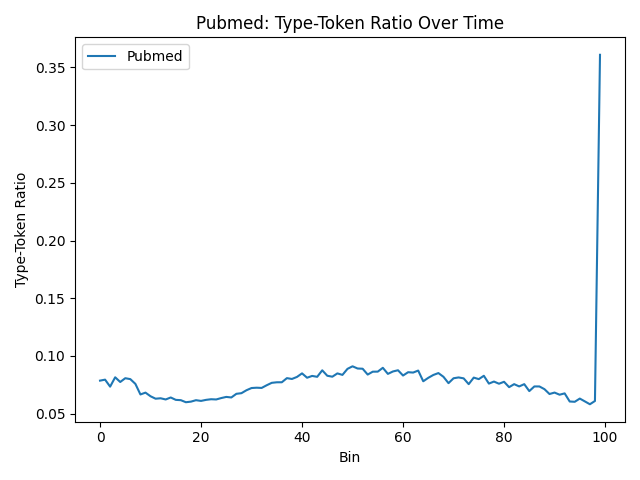

In [222]:
pubmed_ttr_f, pubmed_ttr_a = plt.subplots()

pubmed_ttr_a.plot(bins, bin_ttr, label='Pubmed')
pubmed_ttr_a.set_xlabel('Bin')
pubmed_ttr_a.set_ylabel('Type-Token Ratio')
pubmed_ttr_a.legend()
pubmed_ttr_a.set_title('Pubmed: Type-Token Ratio Over Time')

pubmed_ttr_f.tight_layout()

## Emergence of Unknown Words

In [52]:
moses_df = pandas.read_csv('lpt_df_moses.csv')

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/269334587.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  moses_df = pandas.read_csv('lpt_df_moses.csv')


In [223]:
moses_df['moses_tokens_eval'] = moses_df['moses_tokens'].progress_apply(lambda x : eval(x))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [228]:
s = moses_df['moses_tokens'].sample(1, random_state=3).values[0]
s

"['This', 'study', 'is', 'concerned', 'with', 'internal', 'migration', 'trends', 'in', 'England', 'and', 'Wales', '.', 'It', 'is', 'based', 'on', '1971', 'census', 'data', 'on', 'retrospective', 'marriage', 'fertility', 'and', 'migration', '.', '&quot;', 'The', 'secondary', 'effects', 'of', 'inter', '@-@', 'regional', 'migration', 'by', 'young', 'women', 'have', 'been', 'examined', 'by', 'comparing', 'the', 'addresses', 'of', 'women', 'who', 'had', 'a', 'child', 'in', '1976', 'with', 'their', 'addresses', 'at', 'the', '1971', 'Census', '.', '&quot;', 'Factors', 'affecting', 'migration', 'are', 'considered', 'and', 'the', 'effect', 'of', 'migration', 'on', 'regional', 'population', 'distribution', 'is', 'assessed', '.', '(', 'EXCERPT', ')']"

In [120]:
pubmed_df = moses_df[moses_df['has_pubmed'] == True]
vocabulary_bins = [i for i in range(0,100,20)]

num_unks = np.zeros((len(vocabulary_bins), 100), dtype='int32')
num_unks_uniq = np.zeros((len(vocabulary_bins), 100), dtype='int32')

for i, bidx in tqdm(enumerate(vocabulary_bins), total=len(vocabulary_bins)):
    bin_tokens = pubmed_df[pubmed_df['bin'] <= bidx]['moses_tokens_eval'].to_list()
    flattened_tokens = [tok.lower() for x in bin_tokens for tok in x]
    vocabulary = set(flattened_tokens)
    print(f'Vocabulary {bidx}: {len(vocabulary)}')
    for j, bidy in enumerate(bins):
        bin_unks = []
        bin_tokens = pubmed_df[pubmed_df['bin'] == bidy]['moses_tokens_eval'].to_list()
        flat_bin_tokens = [tok.lower() for x in bin_tokens for tok in x]
        for tok in flat_bin_tokens:
            if tok not in vocabulary:
                bin_unks.append(tok)
        
        num_unks[i][j] = len(bin_unks)
        num_unks_uniq[i][j] = len(set(bin_unks))
        
    

  0%|                                                                                                                                                                                     | 0/5 [00:00<?, ?it/s]

['introduction', '.', 'since', 'the', 'observation', 'by', 'koch', '1', 'of', 'the', 'socalled', '&quot;', 'koch', 'phenomenon', ',', '&quot;', 'the', 'allergic', 'reaction', 'of', 'tuberculous', 'animals', 'to', 'the', 'tubercie', 'bacillus', 'or', 'its', 'products', 'has', 'been', 'a', 'matter', 'of', 'the', 'greatest', 'interest', 'to', 'students', 'of', 'tuberculosis', '.', 'though', 'it', 'was', 'thought', 'at', 'first', 'that', 'tuberculin']
Vocabulary 0: 35369


 20%|██████████████████████████████████▌                                                                                                                                          | 1/5 [00:10<00:40, 10.18s/it]

['introduction', '.', 'since', 'the', 'observation', 'by', 'koch', '1', 'of', 'the', 'socalled', '&quot;', 'koch', 'phenomenon', ',', '&quot;', 'the', 'allergic', 'reaction', 'of', 'tuberculous', 'animals', 'to', 'the', 'tubercie', 'bacillus', 'or', 'its', 'products', 'has', 'been', 'a', 'matter', 'of', 'the', 'greatest', 'interest', 'to', 'students', 'of', 'tuberculosis', '.', 'though', 'it', 'was', 'thought', 'at', 'first', 'that', 'tuberculin']
Vocabulary 20: 198268


 40%|█████████████████████████████████████████████████████████████████████▏                                                                                                       | 2/5 [00:21<00:32, 10.99s/it]

['introduction', '.', 'since', 'the', 'observation', 'by', 'koch', '1', 'of', 'the', 'socalled', '&quot;', 'koch', 'phenomenon', ',', '&quot;', 'the', 'allergic', 'reaction', 'of', 'tuberculous', 'animals', 'to', 'the', 'tubercie', 'bacillus', 'or', 'its', 'products', 'has', 'been', 'a', 'matter', 'of', 'the', 'greatest', 'interest', 'to', 'students', 'of', 'tuberculosis', '.', 'though', 'it', 'was', 'thought', 'at', 'first', 'that', 'tuberculin']
Vocabulary 40: 278812


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 3/5 [00:34<00:23, 11.68s/it]

['introduction', '.', 'since', 'the', 'observation', 'by', 'koch', '1', 'of', 'the', 'socalled', '&quot;', 'koch', 'phenomenon', ',', '&quot;', 'the', 'allergic', 'reaction', 'of', 'tuberculous', 'animals', 'to', 'the', 'tubercie', 'bacillus', 'or', 'its', 'products', 'has', 'been', 'a', 'matter', 'of', 'the', 'greatest', 'interest', 'to', 'students', 'of', 'tuberculosis', '.', 'though', 'it', 'was', 'thought', 'at', 'first', 'that', 'tuberculin']
Vocabulary 60: 331850


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 4/5 [00:47<00:12, 12.37s/it]

['introduction', '.', 'since', 'the', 'observation', 'by', 'koch', '1', 'of', 'the', 'socalled', '&quot;', 'koch', 'phenomenon', ',', '&quot;', 'the', 'allergic', 'reaction', 'of', 'tuberculous', 'animals', 'to', 'the', 'tubercie', 'bacillus', 'or', 'its', 'products', 'has', 'been', 'a', 'matter', 'of', 'the', 'greatest', 'interest', 'to', 'students', 'of', 'tuberculosis', '.', 'though', 'it', 'was', 'thought', 'at', 'first', 'that', 'tuberculin']
Vocabulary 80: 386225


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:02<00:00, 12.48s/it]


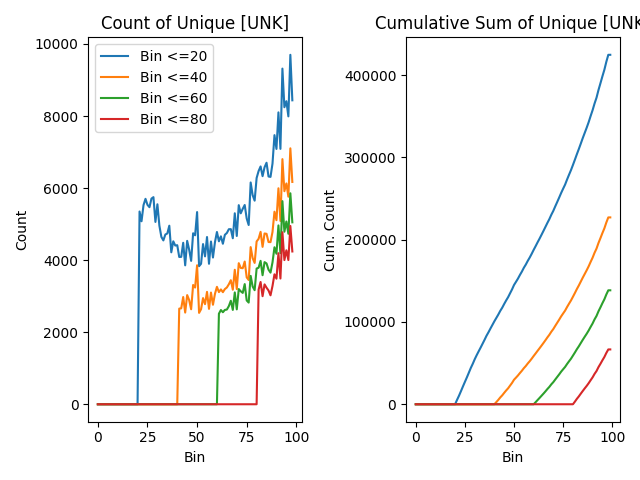

In [126]:
unk_f, unk_a = plt.subplots(1,2)

for i, unks in enumerate(num_unks_uniq[1:]):
    unk_a[1].plot(bins, np.cumsum(unks), label=f'Bin <={vocabulary_bins[i+1]}')
    unk_a[0].plot(bins[:-1], unks[:-1], label=f'Bin <={vocabulary_bins[i+1]}')
    
unk_a[0].legend()
unk_a[1].set_title('Cumulative Sum of Unique [UNK]')
unk_a[0].set_title('Count of Unique [UNK]')

unk_a[0].set_xlabel('Bin')
unk_a[1].set_xlabel('Bin')

unk_a[0].set_ylabel('Count')
unk_a[1].set_ylabel('Cum. Count')
unk_f.tight_layout()

## SentencePiece

In [144]:
import sentencepiece as spm, csv

In [153]:
pubmed_df = moses_df[moses_df['has_pubmed'] == True]
vocabulary_bins = [i for i in range(20,99,20)]

for i, bidx in tqdm(enumerate(vocabulary_bins), total=len(vocabulary_bins)):
    bin_abstracts = pubmed_df[pubmed_df['bin'] <= bidx]['abstract'].astype(str)
    bin_abstracts.to_csv(f'spm_train_files/{bidx}.abstracts.train', index=False, header=False, quoting=csv.QUOTE_NONE, sep='\t')

    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.29s/it]


In [209]:
vocab_sizes = [26483] + [45000] * (len(vocabulary_bins)-1)

for i, bidx in tqdm(enumerate(vocabulary_bins), total=len(vocabulary_bins)):
    # spm.SentencePieceTrainer.train(input=f'spm_train_files/{bidx}.abstracts.train', model_prefix=f'spms/{bidx}_abs', vocab_size=vocab_sizes[i])
    pass


  0%|          | 0/4 [00:00<?, ?it/s]

In [163]:
# # Fertility: 1/n sum(bert_tokens / total_tokens)
# def count_continuation(abstract):
#     tokens = sp.encode(abstract, out_type=str)
#     return len(tokens) - ''.join(tokens).count('▁')  

# for i, bidx in tqdm(enumerate(vocabulary_bins), total=len(vocabulary_bins)):
#     sp = spm.SentencePieceProcessor(model_file=f'spms/{bidx}_abs.model')
#     pubmed_df[f'num_spm_{bidx}_tokens'] = pubmed_df['abstract'].progress_apply(lambda x : len(sp.encode(x)))
#     pubmed_df[f'num_spm_{bidx}_continuation_tokens'] = pubmed_df['abstract'].progress_apply(lambda x : count_continuation(x))
    
# pubmed_df['num_moses_tokens'] = pubmed_df['moses_tokens'].progress_apply(lambda x : x.count(',') + 1)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/198634 [00:00<?, ?it/s]

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/2599003013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmed_df[f'num_spm_{bidx}_tokens'] = pubmed_df['abstract'].progress_apply(lambda x : len(sp.encode(x)))


  0%|          | 0/198634 [00:00<?, ?it/s]

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/2599003013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmed_df[f'num_spm_{bidx}_tokens'] = pubmed_df['abstract'].progress_apply(lambda x : len(sp.encode(x)))


  0%|          | 0/198634 [00:00<?, ?it/s]

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/2599003013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmed_df[f'num_spm_{bidx}_tokens'] = pubmed_df['abstract'].progress_apply(lambda x : len(sp.encode(x)))


  0%|          | 0/198634 [00:00<?, ?it/s]

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/2599003013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmed_df[f'num_spm_{bidx}_tokens'] = pubmed_df['abstract'].progress_apply(lambda x : len(sp.encode(x)))


  0%|          | 0/198634 [00:00<?, ?it/s]

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/2599003013.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmed_df['num_moses_tokens'] = pubmed_df['moses_tokens'].progress_apply(lambda x : x.count(',') + 1)


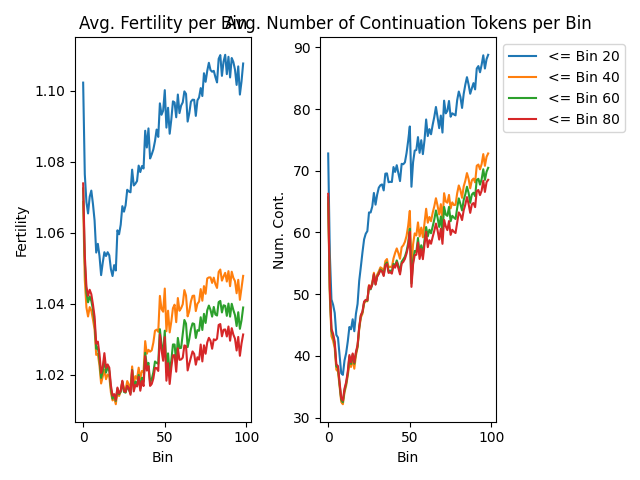

In [203]:
spm_props_f, spm_props_a = plt.subplots(1,2)

bins = pubmed_df['bin'].unique()
fertilities = np.zeros((len(vocabulary_bins), len(bins)))
stds = np.zeros((len(vocabulary_bins), len(bins)))
num_conts = np.zeros((len(vocabulary_bins), len(bins)))
for i, bidx in enumerate(vocabulary_bins):
   
    for j, bidy in enumerate(bins):
        
        bin_df = pubmed_df[pubmed_df['bin'] == bidy]
        bin_fertility = (bin_df[f'num_spm_{bidx}_tokens'] / bin_df['num_moses_tokens']).mean()
        num_cont = bin_df[f'num_spm_{bidx}_continuation_tokens'].mean()
        
        fertilities[i][j] = bin_fertility
        num_conts[i][j] = num_cont
        stds[i][j] = (bin_df[f'num_spm_{bidx}_tokens'] / bin_df['num_moses_tokens']).std()
        
    spm_props_a[0].plot(bins[:-1], fertilities[i][:-1], label=f'<= Bin {bidx}')
    spm_props_a[1].plot(bins[:-1], num_conts[i][:-1], label=f'<= Bin {bidx}')

spm_props_a[0].set_xlabel('Bin')
spm_props_a[0].set_ylabel('Fertility')
spm_props_a[0].set_title('Avg. Fertility per Bin')

spm_props_a[1].set_xlabel('Bin')
spm_props_a[1].set_ylabel('Num. Cont.')
spm_props_a[1].set_title('Avg. Number of Continuation Tokens per Bin')
spm_props_a[1].legend(bbox_to_anchor=(1,1), loc='upper left')


spm_props_f.tight_layout()

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/198634 [00:00<?, ?it/s]

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/90607843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmed_df[f'num_spm_{bidx}_continuation_tokens'] = pubmed_df['abstract'].progress_apply(lambda x : count_continuation(x))


  0%|          | 0/198634 [00:00<?, ?it/s]

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/90607843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmed_df[f'num_spm_{bidx}_continuation_tokens'] = pubmed_df['abstract'].progress_apply(lambda x : count_continuation(x))


  0%|          | 0/198634 [00:00<?, ?it/s]

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/90607843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmed_df[f'num_spm_{bidx}_continuation_tokens'] = pubmed_df['abstract'].progress_apply(lambda x : count_continuation(x))


  0%|          | 0/198634 [00:00<?, ?it/s]

/rc_scratch/abeb4417/abeb4417/tmp/ipykernel_4395/90607843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmed_df[f'num_spm_{bidx}_continuation_tokens'] = pubmed_df['abstract'].progress_apply(lambda x : count_continuation(x))


In [204]:
pubmed_df.to_csv('pubmed_df.csv')

In [208]:
pubmed_df.groupby('bin').size()

bin
0     2063
1     1927
2     2649
3     2124
4     2574
      ... 
95    2311
96    2360
97    2751
98    2367
99      11
Length: 100, dtype: int64